In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ski_hotels.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              407 non-null    int64  
 1   country                 407 non-null    object 
 2   resort                  407 non-null    object 
 3   hotel                   407 non-null    object 
 4   price (£)               407 non-null    int64  
 5   distance_from_lift_(m)  407 non-null    object 
 6   altitude (m)            407 non-null    int64  
 7   totalPiste (km)         407 non-null    int64  
 8   totalLifts              407 non-null    int64  
 9   gondolas                407 non-null    int64  
 10  chairlifts              407 non-null    int64  
 11  draglifts               407 non-null    int64  
 12  blues                   407 non-null    float64
 13  reds                    407 non-null    float64
 14  blacks                  407 non-null    fl

In [4]:
df.head(407)

,Unnamed: 0,country,resort,hotel,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,...,blacks,totalRuns,link,sleeps,decSnowLow2020(cm),decSnowHigh2020(cm),janSnowLow2020(cm),janSnowHigh2020(cm),febSnowLow2020(cm),febSnowHigh2020(cm)
0,0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,402,france,val-thorens,hotel-fitz-roy,2216,unknown,2300,600,183,40,...,32.0,321.0,https://www.igluski.com/ski-resorts/france/val...,112,98,121,215,267,207,269
403,403,austria,ischgl,hotel-fliana,2258,unknown,1400,230,48,9,...,15.0,98.0,https://www.igluski.com/ski-resorts/austria/is...,30,20,70,50,120,63,131
404,404,austria,ischgl,hotel-elisabeth,2420,unknown,1400,230,48,9,...,15.0,98.0,https://www.igluski.com/ski-resorts/austria/is...,110,20,70,50,120,63,131
405,405,austria,ischgl,hotel-trofana-royal,2484,unknown,1400,230,48,9,...,15.0,98.0,https://www.igluski.com/ski-resorts/austria/is...,164,20,70,50,120,63,131


In [5]:
selected_columns = ['price (£)', 'totalPiste (km)']

# Calculate the mean for the selected columns
means = df[selected_columns].mean()

# Print the means for the selected columns
print(means)

price (£)          1095.027027
totalPiste (km)     220.270270
dtype: float64


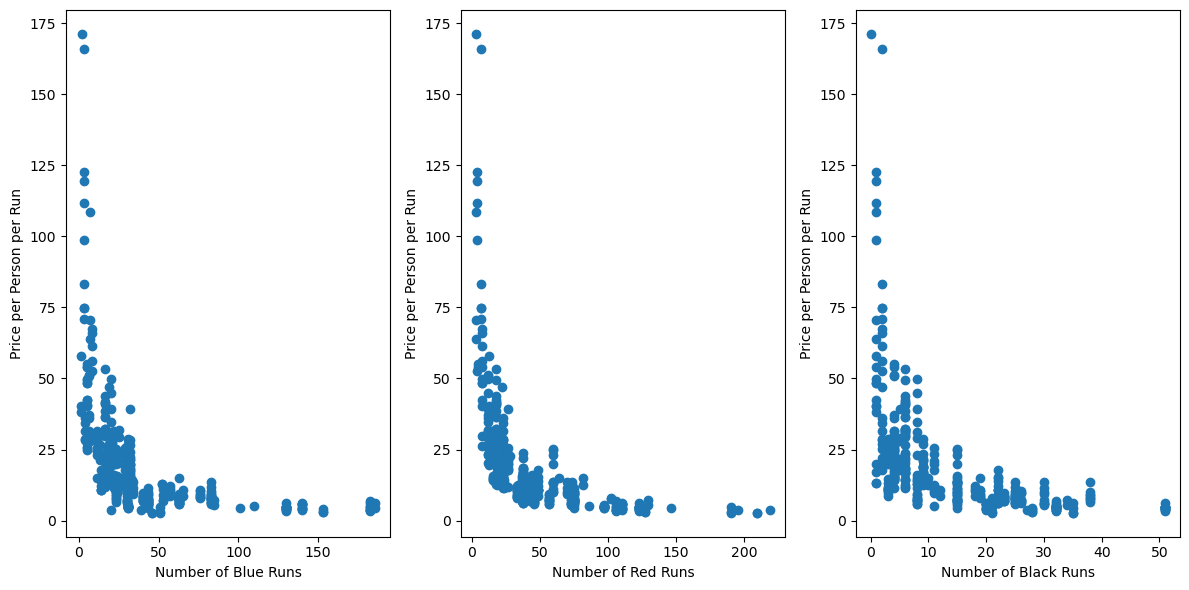

In [6]:
# Convert columns to appropriate data types
df['distance_from_lift_(m)'] = pd.to_numeric(df['distance_from_lift_(m)'], errors='coerce')
df['decSnowLow2020(cm)'] = pd.to_numeric(df['decSnowLow2020(cm)'], errors='coerce')
df['decSnowHigh2020(cm)'] = pd.to_numeric(df['decSnowHigh2020(cm)'], errors='coerce')
df['janSnowLow2020(cm)'] = pd.to_numeric(df['janSnowLow2020(cm)'], errors='coerce')
df['janSnowHigh2020(cm)'] = pd.to_numeric(df['janSnowHigh2020(cm)'], errors='coerce')
df['febSnowLow2020(cm)'] = pd.to_numeric(df['febSnowLow2020(cm)'], errors='coerce')
df['febSnowHigh2020(cm)'] = pd.to_numeric(df['febSnowHigh2020(cm)'], errors='coerce')

# Calculate the total number of runs (sum of blue, red, and black runs)
df['totalRuns'] = df['blues'] + df['reds'] + df['blacks']

# Calculate the average price per person per run
df['price_per_run'] = df['price (£)'] / df['totalRuns']

# Analyze the relationship between the number of runs and price per person
plt.figure(figsize=(12, 6))

# Scatter plot for blue runs
plt.subplot(1, 3, 1)
plt.scatter(df['blues'], df['price_per_run'])
plt.xlabel('Number of Blue Runs')
plt.ylabel('Price per Person per Run')

# Scatter plot for red runs
plt.subplot(1, 3, 2)
plt.scatter(df['reds'], df['price_per_run'])
plt.xlabel('Number of Red Runs')
plt.ylabel('Price per Person per Run')

# Scatter plot for black runs
plt.subplot(1, 3, 3)
plt.scatter(df['blacks'], df['price_per_run'])
plt.xlabel('Number of Black Runs')
plt.ylabel('Price per Person per Run')

plt.tight_layout()
plt.show()

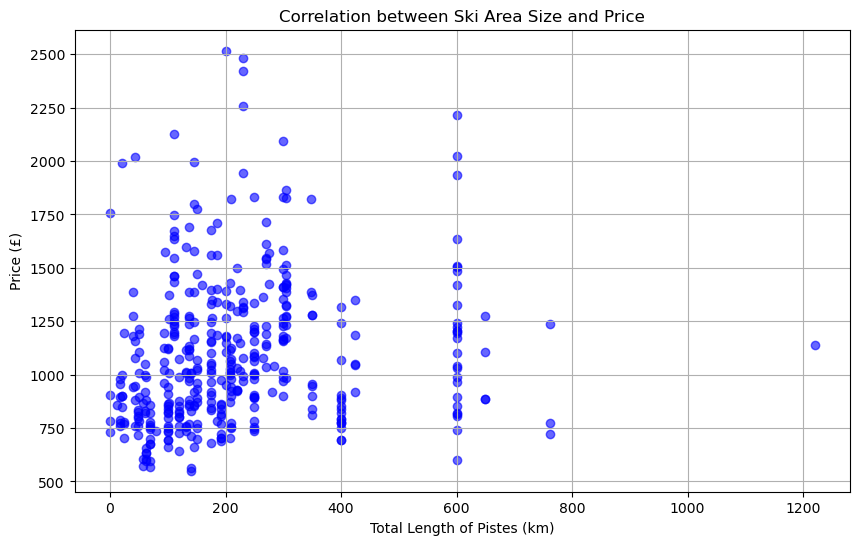

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['totalPiste (km)'], df['price (£)'], color='blue', alpha=0.6)
plt.title('Correlation between Ski Area Size and Price')
plt.xlabel('Total Length of Pistes (km)')
plt.ylabel('Price (£)')
plt.grid(True)
plt.show()

In [8]:
correlation_coefficient = df['totalPiste (km)'].corr(df['price (£)'])

print(f"Person Correlation Coefficient between Ski Area Size and Price: {correlation_coefficient:.2f}")

Person Correlation Coefficient between Ski Area Size and Price: 0.16


In [9]:
correlation_coefficient = df['totalPiste (km)'].corr(df['price (£)'])

# Set the threshold for significance
threshold = 0.5  # Adjust this value based on your significance level

# Check if the correlation coefficient is significant
if abs(correlation_coefficient) > threshold:
    if correlation_coefficient > 0:
        print("Yes, there is a significant positive correlation between ski area size and price.")
    else:
        print("Yes, there is a significant negative correlation between ski area size and price.")
else:
    print("No, there is no significant correlation between ski area size and price.")

No, there is no significant correlation between ski area size and price.


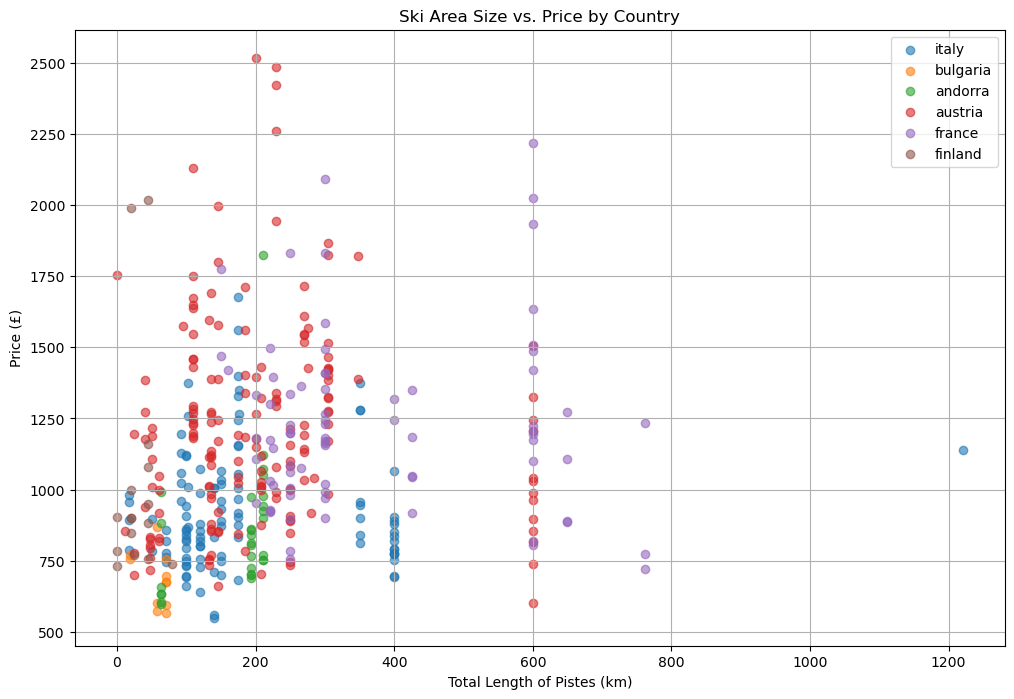

In [11]:
plt.figure(figsize=(12, 8))
for country in df['country'].unique():
    country_df = df[df['country'] == country]
    plt.scatter(country_df['totalPiste (km)'], country_df['price (£)'], label=country, alpha=0.6)

plt.title('Ski Area Size vs. Price by Country')
plt.xlabel('Total Length of Pistes (km)')
plt.ylabel('Price (£)')
plt.legend()
plt.grid(True)
plt.show()

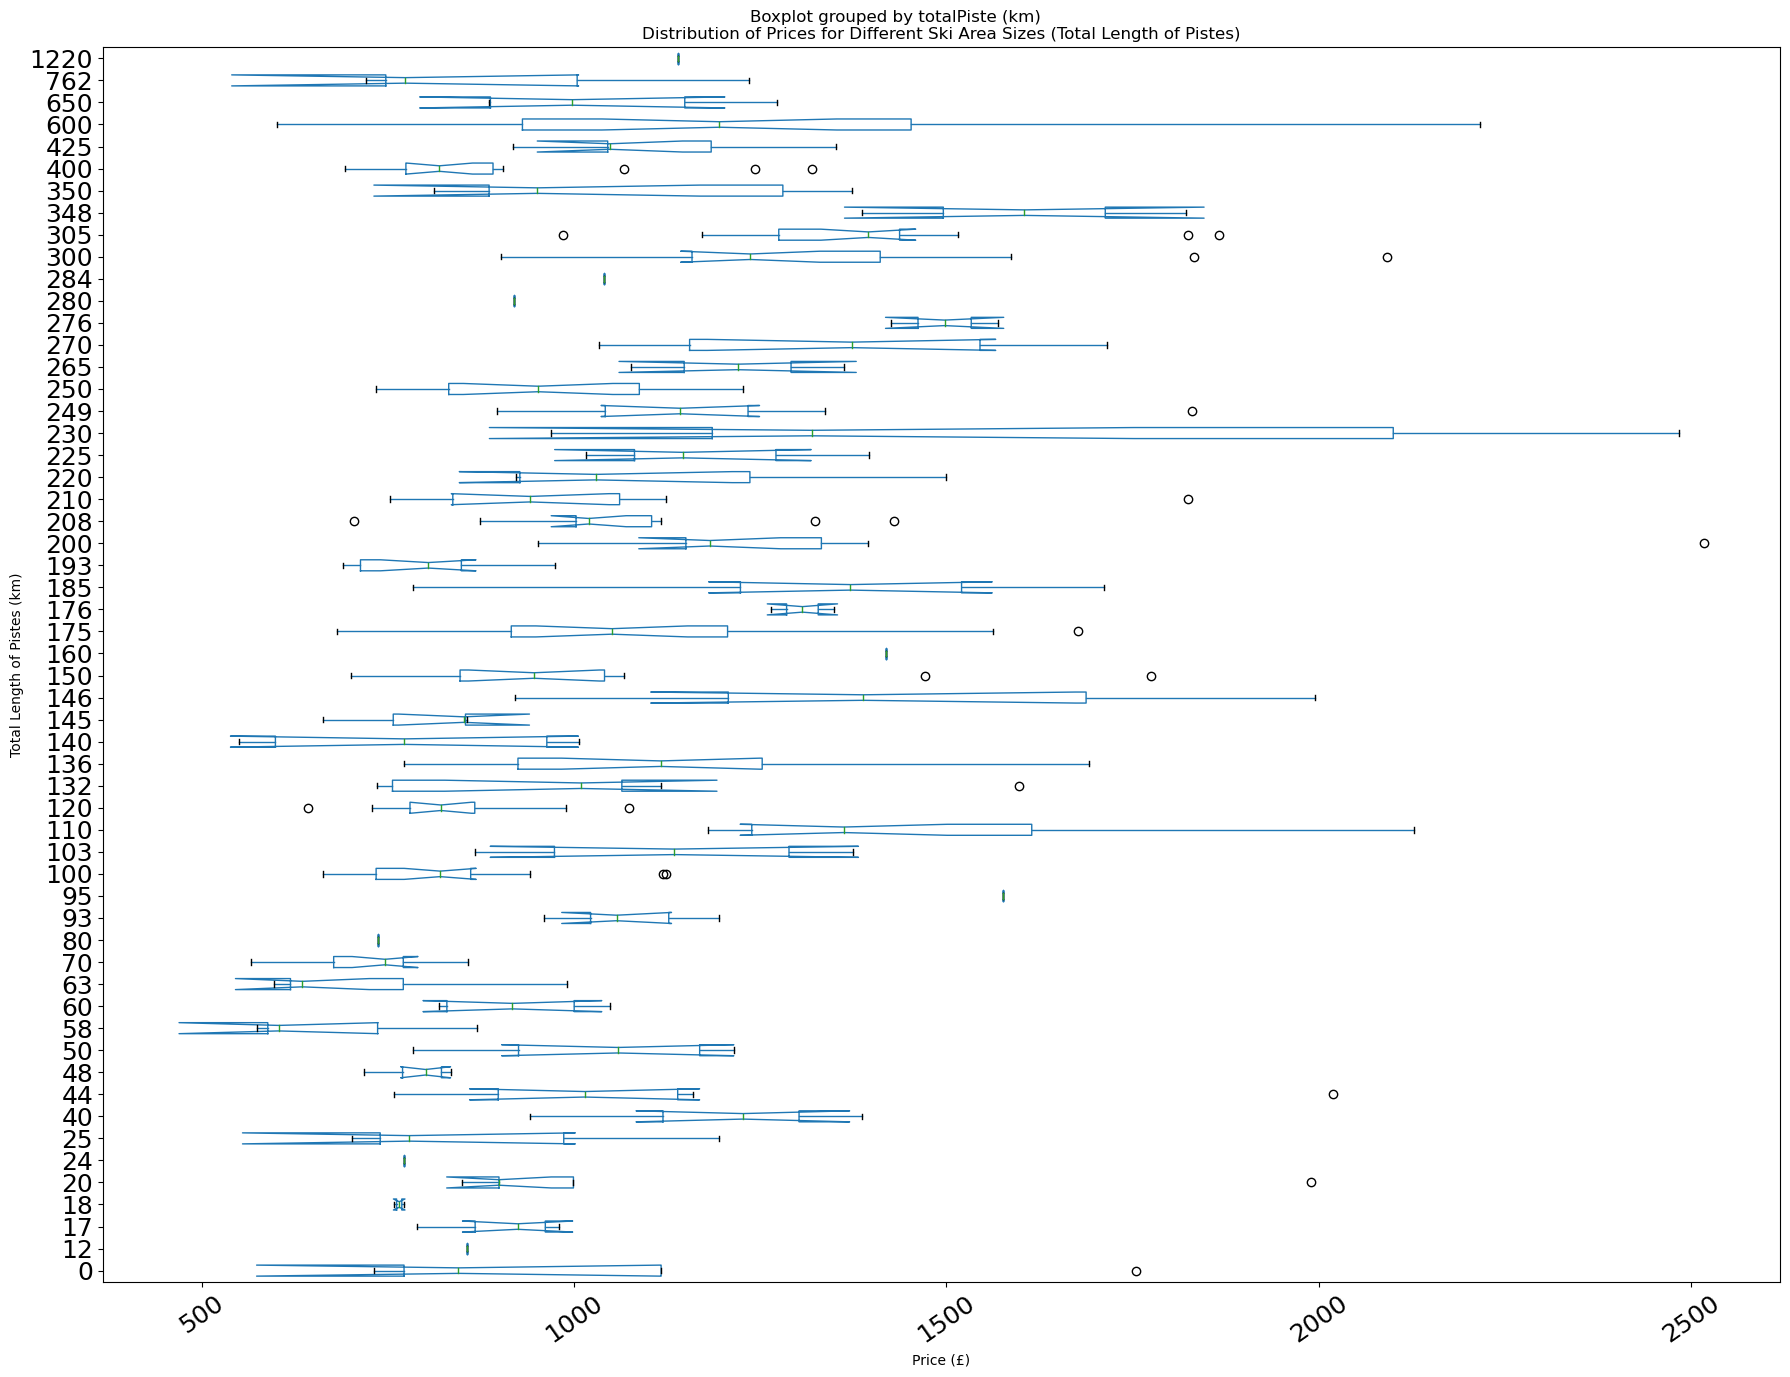

In [33]:
# Create a taller graph using subplots
fig, ax = plt.subplots(figsize=(18, 14))

# Box plot with rotated x-axis labels and larger y-axis tick labels
boxplot = df.boxplot(column='price (£)', by='totalPiste (km)', grid=False, notch=True, vert=False, ax=ax)
ax.set_xlabel('Price (£)')
ax.set_ylabel('Total Length of Pistes (km)')
ax.set_title('Distribution of Prices for Different Ski Area Sizes (Total Length of Pistes)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=35)

# Adjust y-axis ticks to display fewer ticks for better readability
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)
plt.tight_layout()
plt.show()

In [34]:
median_price = df['price (£)'].median()

print(f"The median price is: £{median_price:.2f}")

The median price is: £1021.00
